# Import Library

In [ ]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasi yang lebih menarik
import warnings                 # Handling peringatan yang ditampilkan
warnings.filterwarnings("ignore")

# Import Dataset

In [ ]:
! pip install kaggle

Sinkronisasi Google Colab dengan Kaggle

In [ ]:
cred = {"username":"poweropel","key":"6c5f639c8e4eba571b344b9d0a5d86c7"}

Credential bisa didapat di account kaggle kemudian scroll ke API Token

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.54MB/s]


Download dataset, copas link pada halaman dataset kemudian hapus bagian kaggle.com/ sisakan link setelahnya

In [ ]:
! unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Karena file masih dalam bentuk zip, maka kita perlu unzip file tersebut dan didapatkan isi dari file .zip tersebut

In [ ]:
cols = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending']
df = pd.read_csv('../content/Mall_Customers.csv', names=cols, header=0)
df = df[['CustomerID', 'Age', 'Gender', 'Income', 'Spending']]
df

,CustomerID,Age,Gender,Income,Spending
0,1,19,Male,15,39
1,2,21,Male,15,81
2,3,20,Female,16,6
3,4,23,Female,16,77
4,5,31,Female,17,40
...,...,...,...,...,...
195,196,35,Female,120,79
196,197,45,Female,126,28
197,198,32,Male,126,74
198,199,32,Male,137,18


In [ ]:
df.head()

,CustomerID,Age,Gender,Income,Spending
0,1,19,Male,15,39
1,2,21,Male,15,81
2,3,20,Female,16,6
3,4,23,Female,16,77
4,5,31,Female,17,40


In [ ]:
df.tail()

,CustomerID,Age,Gender,Income,Spending
195,196,35,Female,120,79
196,197,45,Female,126,28
197,198,32,Male,126,74
198,199,32,Male,137,18
199,200,30,Male,137,83


Membaca isi dataset dan menampilkan head atau sampel bagian atas dataset

In [ ]:
df.shape

(200, 5)

Mengecek banyakanya fitur dan jumlah data

# Exploratory Data Analysis

## Data Description

1. CustomerID: Unique ID assigned to the customer
2. Gender: Gender of the customer
3. Age: Age of the customer
4. Annual Income: Annual Income of the customer
5. Spending Sore: Score assigned by the mall based on customer behavior and spending nature





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Age         200 non-null    int64 
 2   Gender      200 non-null    object
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

CustomerID    0
Age           0
Gender        0
Income        0
Spending      0
dtype: int64

In [ ]:
df.isnull().sum()

CustomerID    0
Age           0
Gender        0
Income        0
Spending      0
dtype: int64

In [ ]:
df.nunique()

CustomerID    200
Age            51
Gender          2
Income         64
Spending       84
dtype: int64

In [ ]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [ ]:
value_counts = {column: df[column].value_counts() for column in df.columns}

value_counts

{'CustomerID': 1      1
 138    1
 128    1
 129    1
 130    1
       ..
 70     1
 71     1
 72     1
 73     1
 200    1
 Name: CustomerID, Length: 200, dtype: int64,
 'Age': 32    11
 35     9
 19     8
 31     8
 30     7
 49     7
 40     6
 38     6
 47     6
 27     6
 36     6
 23     6
 34     5
 20     5
 29     5
 50     5
 48     5
 21     5
 24     4
 18     4
 28     4
 67     4
 59     4
 54     4
 43     3
 60     3
 45     3
 39     3
 33     3
 37     3
 22     3
 25     3
 46     3
 68     3
 52     2
 44     2
 66     2
 57     2
 26     2
 53     2
 42     2
 63     2
 70     2
 51     2
 58     2
 65     2
 41     2
 55     1
 69     1
 64     1
 56     1
 Name: Age, dtype: int64,
 'Gender': Female    112
 Male       88
 Name: Gender, dtype: int64,
 'Income': 54     12
 78     12
 48      6
 71      6
 63      6
        ..
 58      2
 59      2
 16      2
 64      2
 137     2
 Name: Income, Length: 64, dtype: int64,
 'Spending': 42    8
 55    7
 46    6
 73    

## Data Vizualitation

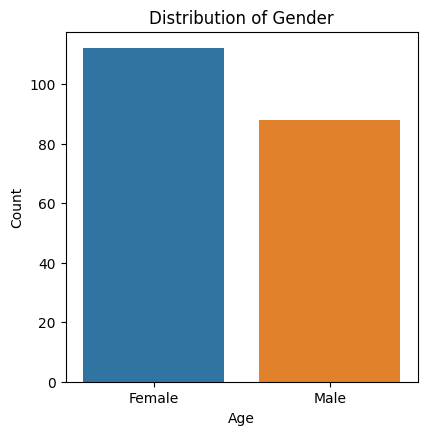

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

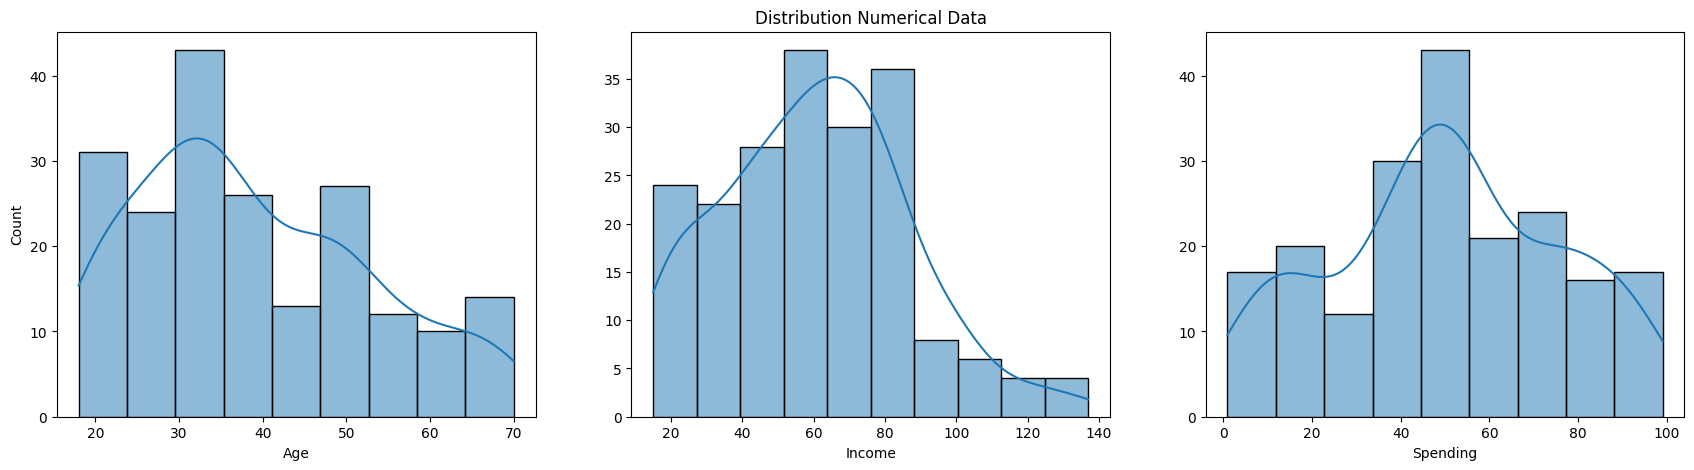

In [ ]:
plt.figure(figsize = (21, 5))
n = 0
for cols in ['Age','Income','Spending']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.histplot(df[cols], kde=True)
    plt.ylabel('Count' if n == 1 else '')
    plt.title('Distribution Numerical Data' if n == 2 else '')
plt.show()

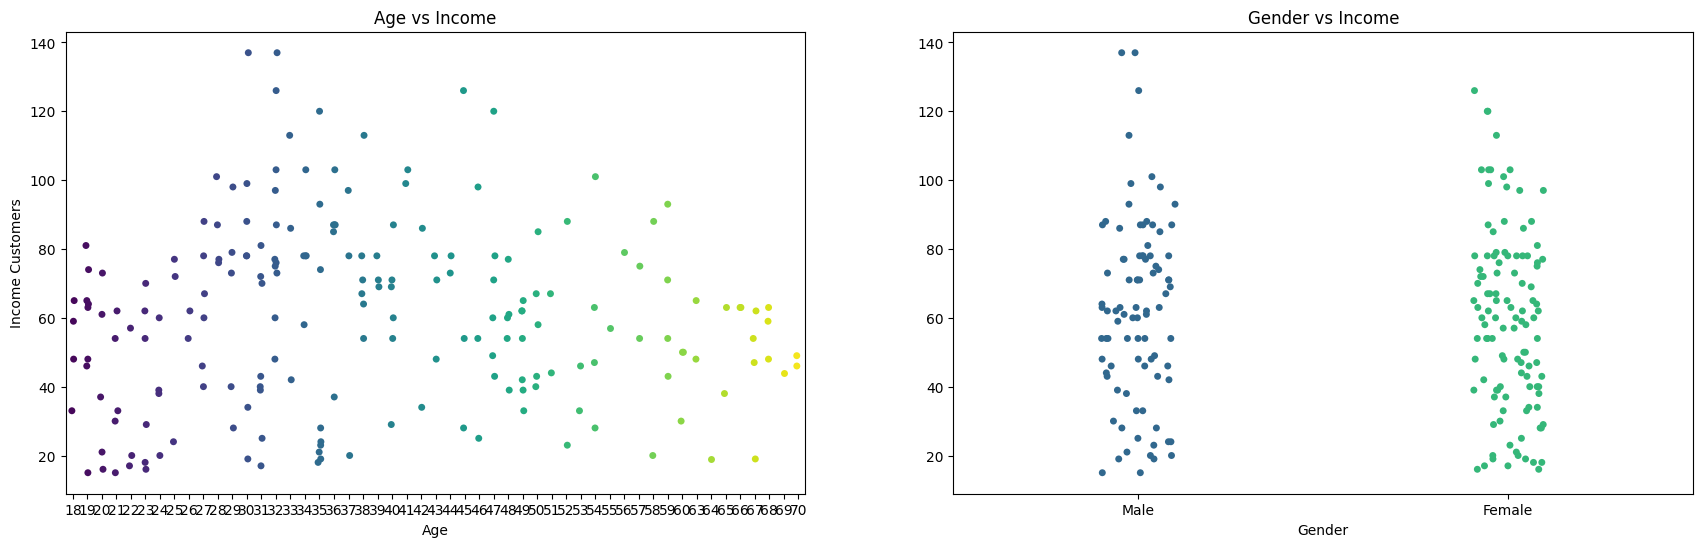

In [ ]:
plt.figure(figsize = (21 ,6))
n = 0
for cols in ['Age','Gender']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
    sns.stripplot(x = cols, y = 'Income', data = df, palette='viridis')
    plt.ylabel('Income Customers' if n == 1 else '')
    plt.title('Age vs Income' if n == 1 else 'Gender vs Income')
plt.show()

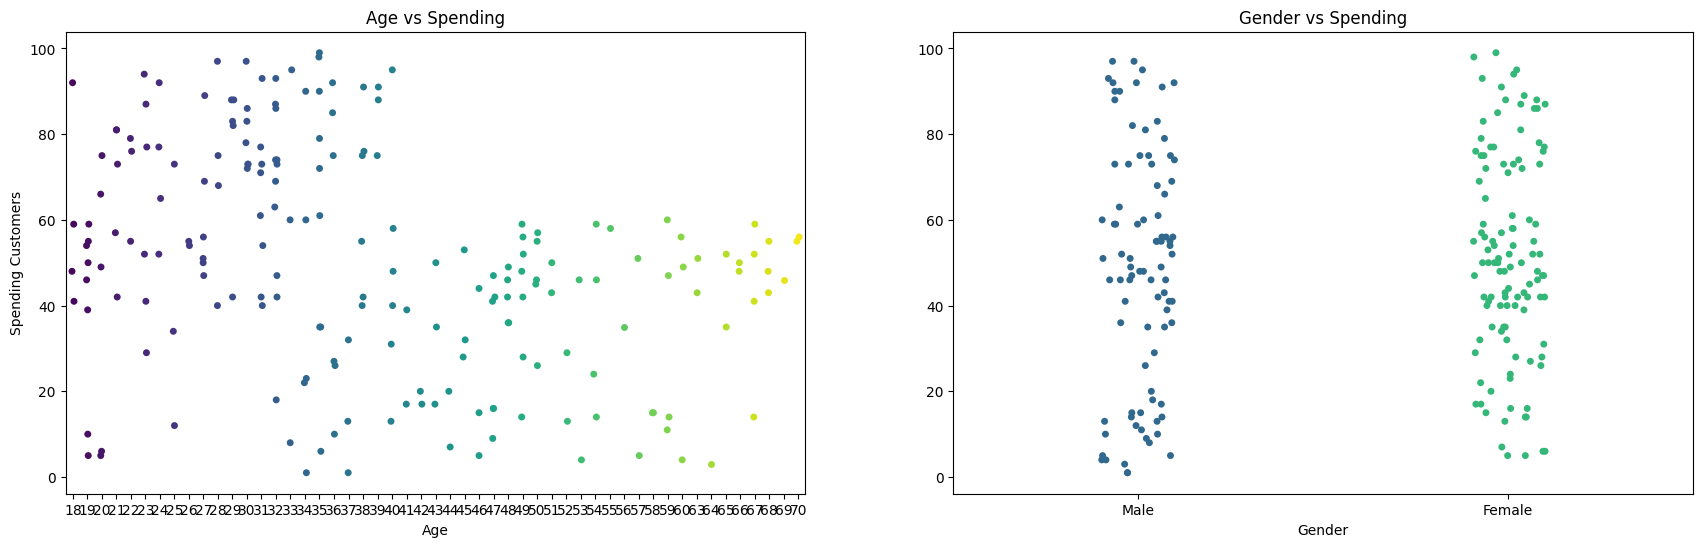

In [ ]:
plt.figure(figsize = (21 ,6))
n = 0
for cols in ['Age','Gender']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
    sns.stripplot(x = cols, y = 'Spending', data = df, palette='viridis')
    plt.ylabel('Spending Customers' if n == 1 else '')
    plt.title('Age vs Spending' if n == 1 else 'Gender vs Spending')
plt.show()

In [ ]:
cols = list(df.columns)
cols.remove('CustomerID')
print(cols)

['Age', 'Gender', 'Income', 'Spending']


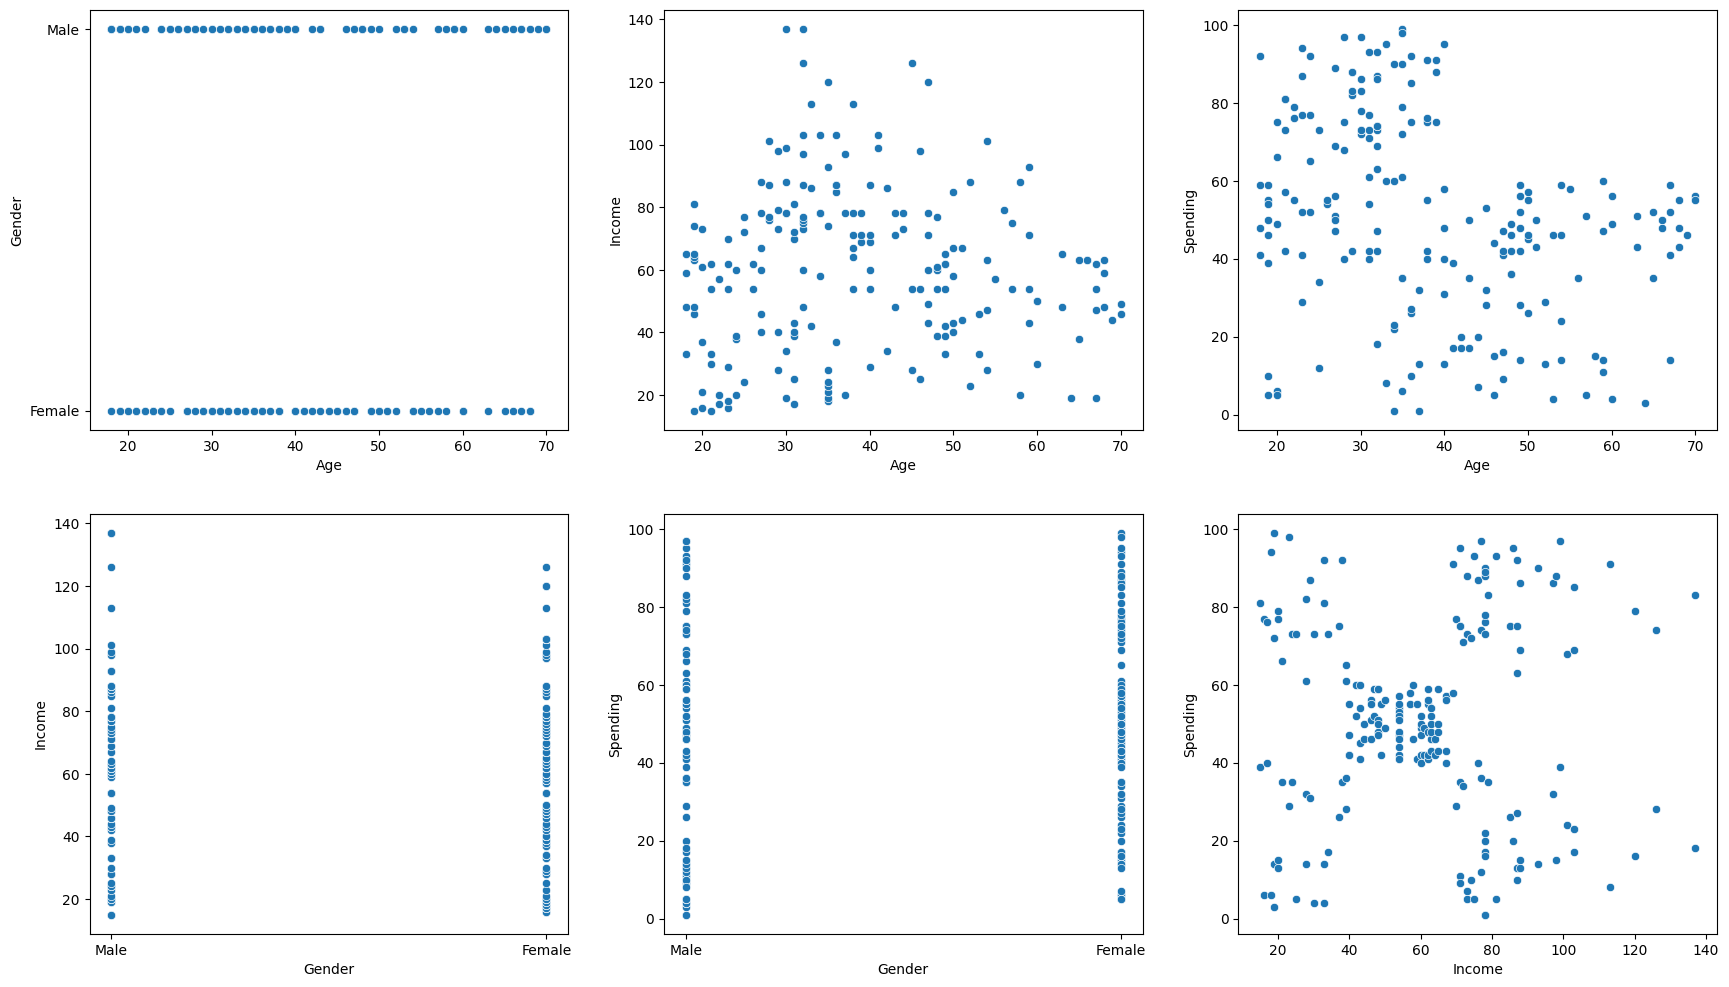

In [ ]:
plt.figure(figsize = (21, 12))
n = 0
for i in range(len(cols)):
  for j in range(i+1, len(cols)):
    n += 1
    plt.subplot(2 , 3 , n)
    sns.scatterplot(data=df, x=cols[i], y=cols[j])
    plt.ylabel(cols[j])
    plt.xlabel(cols[i])

plt.show()

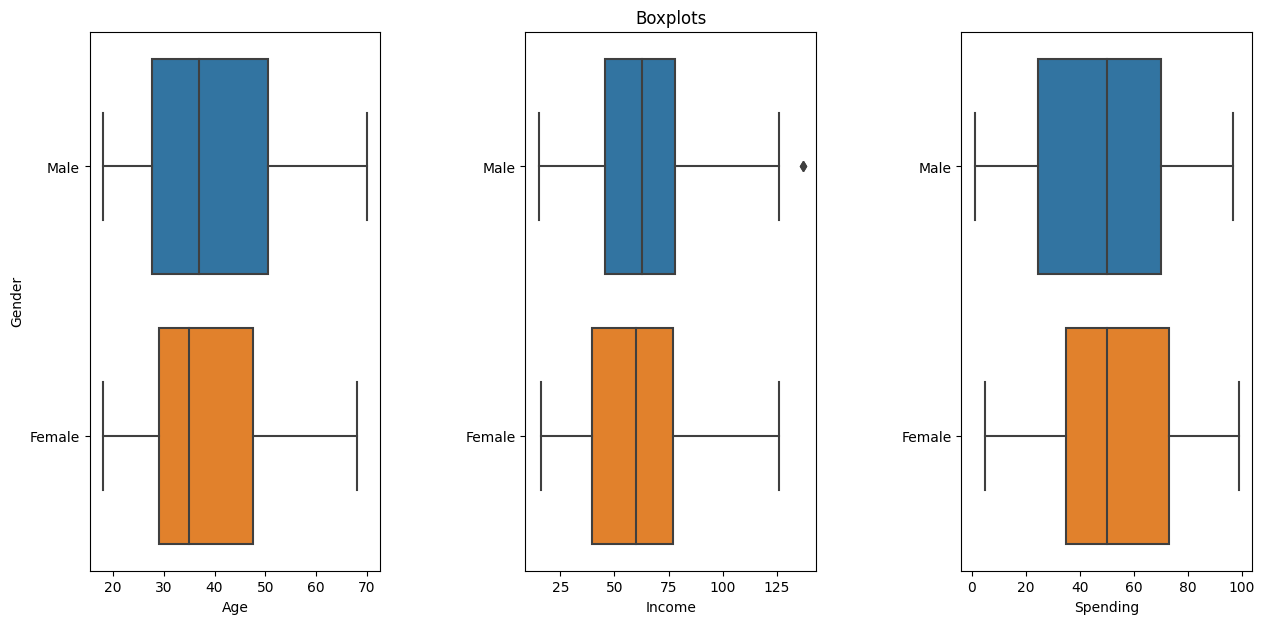

In [ ]:
plt.figure(figsize = (15 ,7))
n = 0
for cols in ['Age','Income','Spending']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots' if n == 2 else '')
plt.show()

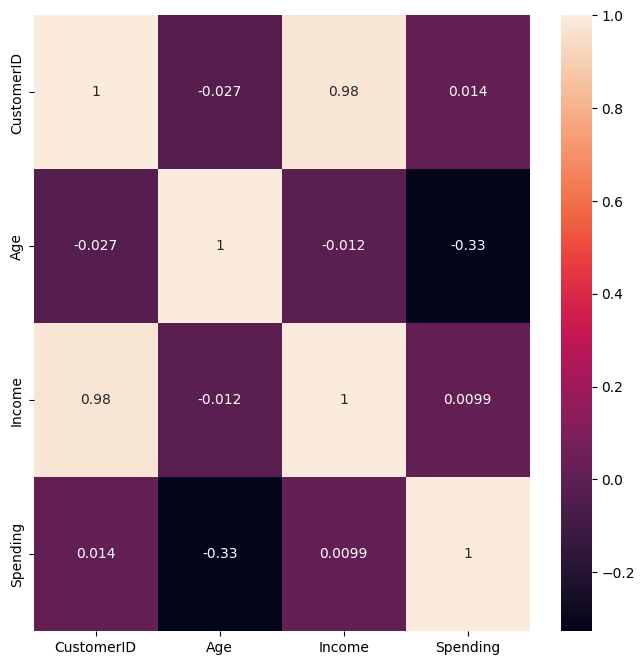

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

plt.show()

In [ ]:
map = {'Male': 0, 'Female': 1}
df.Gender.replace(map, inplace=True)

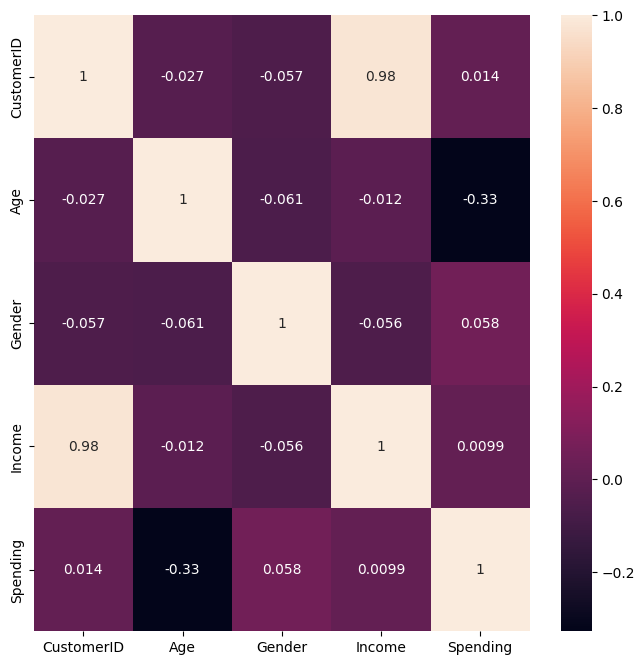

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

plt.show()

# Preprocessing

## Transform Feature

In [ ]:
df.drop('CustomerID', axis=1, inplace = True)

In [ ]:
df.head()

,Age,Gender,Income,Spending
0,19,0,15,39
1,21,0,15,81
2,20,1,16,6
3,23,1,16,77
4,31,1,17,40


# Modelling ML

## K-Means

In [ ]:
# Use Income and Spending columns
df.iloc[:, [2, 3]].values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = df.iloc[:, [2, 3]].values

wcss = []
scores = []
for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(x, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [181363.59595959593]
silhoutte score for n_clusters = 2 is 0.2968969162503008
wcss score for n_cluster = 3 is [181363.59595959593, 106348.37306211122]
silhoutte score for n_clusters = 3 is 0.46761358158775435
wcss score for n_cluster = 4 is [181363.59595959593, 106348.37306211122, 73679.78903948836]
silhoutte score for n_clusters = 4 is 0.4931963109249047
wcss score for n_cluster = 5 is [181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337]
silhoutte score for n_clusters = 5 is 0.553931997444648
wcss score for n_cluster = 6 is [181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346]
silhoutte score for n_clusters = 6 is 0.5379675585622219
wcss score for n_cluster = 7 is [181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30259.65720728547]
silhoutte score for n_clusters = 7 is 0.5264283703685728


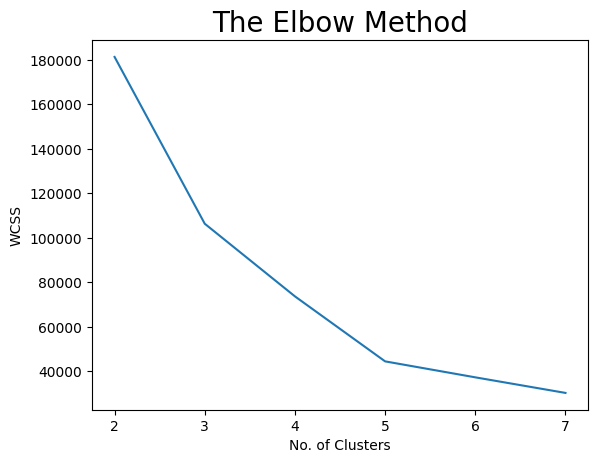

In [ ]:
# Visualizing Elbow Method
plt.plot(range(2, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

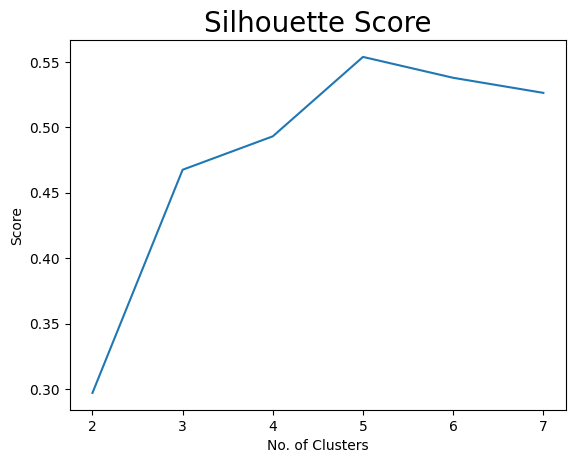

In [ ]:
# Visualizing Silhouette Score
plt.plot(range(2, 8), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [ ]:
# Model Build
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans= kmeansmodel.fit_predict(x)

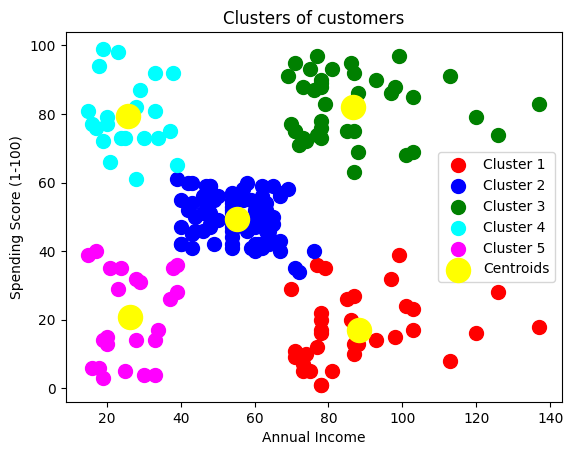

In [ ]:
# Visualizing all the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as shc
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

df_hc = df.copy()
scaler = StandardScaler()
df_matrix = scaler.fit_transform(df_hc)

In [ ]:
df_matrix

array([[-1.42456879, -1.12815215, -1.73899919, -0.43480148],
       [-1.28103541, -1.12815215, -1.73899919,  1.19570407],
       [-1.3528021 ,  0.88640526, -1.70082976, -1.71591298],
       [-1.13750203,  0.88640526, -1.70082976,  1.04041783],
       [-0.56336851,  0.88640526, -1.66266033, -0.39597992],
       [-1.20926872,  0.88640526, -1.66266033,  1.00159627],
       [-0.27630176,  0.88640526, -1.62449091, -1.71591298],
       [-1.13750203,  0.88640526, -1.62449091,  1.70038436],
       [ 1.80493225, -1.12815215, -1.58632148, -1.83237767],
       [-0.6351352 ,  0.88640526, -1.58632148,  0.84631002],
       [ 2.02023231, -1.12815215, -1.58632148, -1.4053405 ],
       [-0.27630176,  0.88640526, -1.58632148,  1.89449216],
       [ 1.37433211,  0.88640526, -1.54815205, -1.36651894],
       [-1.06573534,  0.88640526, -1.54815205,  1.04041783],
       [-0.13276838, -1.12815215, -1.54815205, -1.44416206],
       [-1.20926872, -1.12815215, -1.54815205,  1.11806095],
       [-0.27630176,  0.

In [ ]:
length = df_matrix.shape[0]
D = scipy.zeros([length,length]) # Membuat matrix 2 dimensi dari panjang length dengan nilai set 0 semua
for i in range(length):
    for j in range(length):
        D[i,j] = scipy.spatial.distance.euclidean(df_matrix[i], df_matrix[j]) # Matrix jarak euclidean disimpan dalam variabel D

In [ ]:
Z1 = shc.linkage(D, 'complete')
max_clust = 4
clusters1 = fcluster(Z1, max_clust, criterion='maxclust')
clusters1

array([2, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       1, 4, 1, 1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1,
       1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 3, 4, 3, 4, 3,
       3, 3], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(D, clusters1)
silhouette_avg

0.18051855200754288

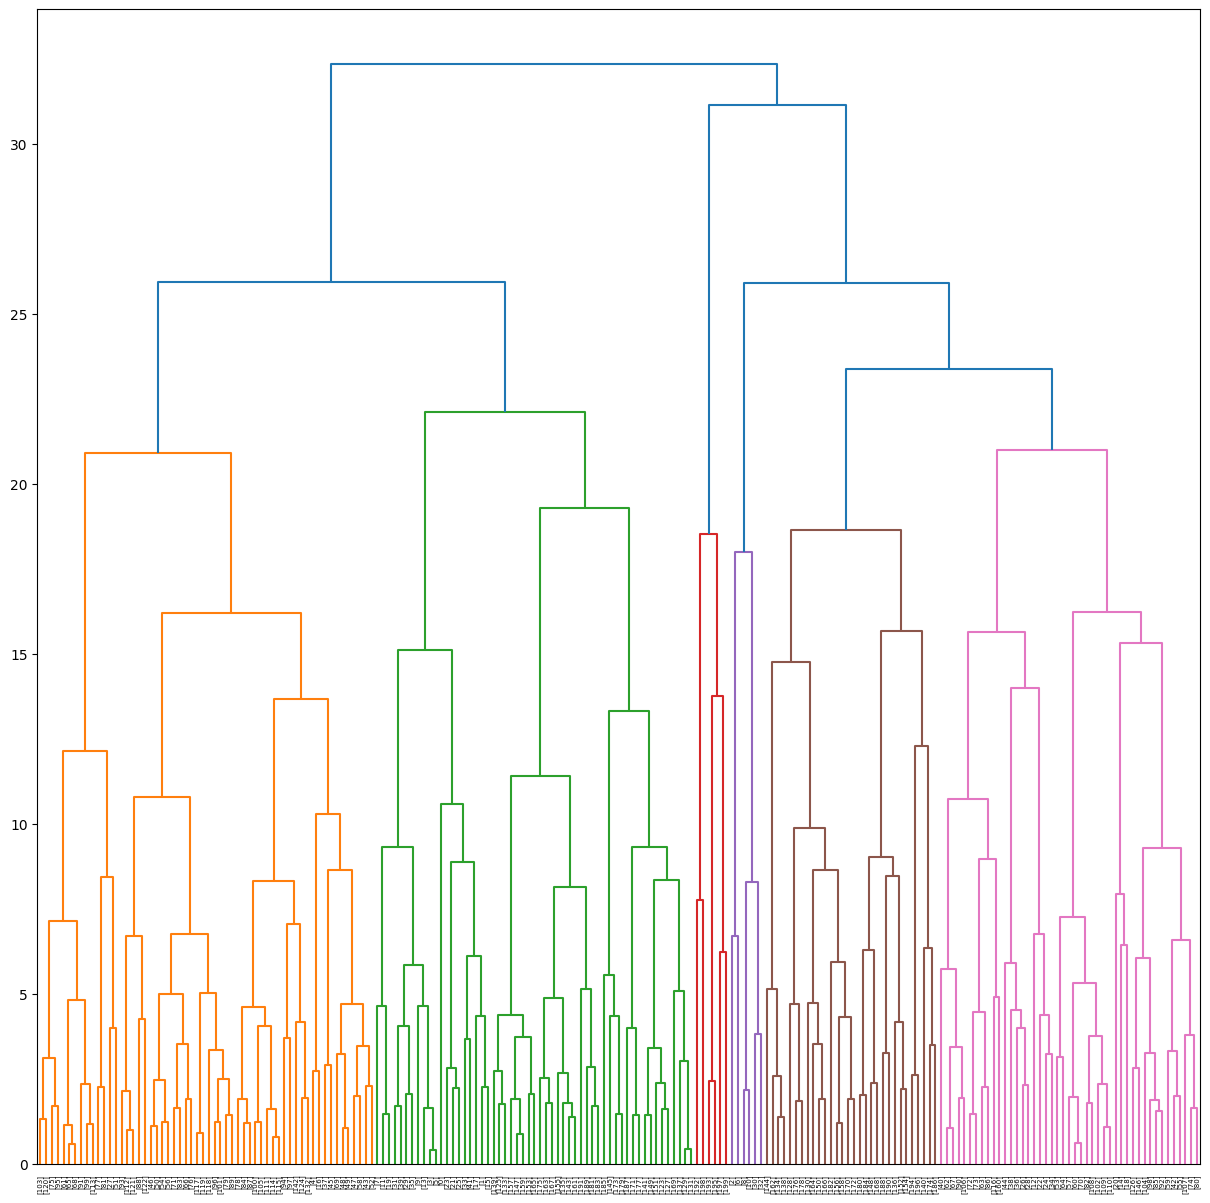

In [ ]:
plt.figure(figsize=(10,10))
dendro = shc.dendrogram(Z1, leaf_label_func=(lambda id: '[%s]' %id))

In [ ]:
Z2 = shc.linkage(D, 'single')
max_clust = 4
clusters2 = fcluster(Z2, max_clust, criterion='maxclust')
clusters2

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2,
       4, 2], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(D, clusters2)
silhouette_avg

0.18312222198234399

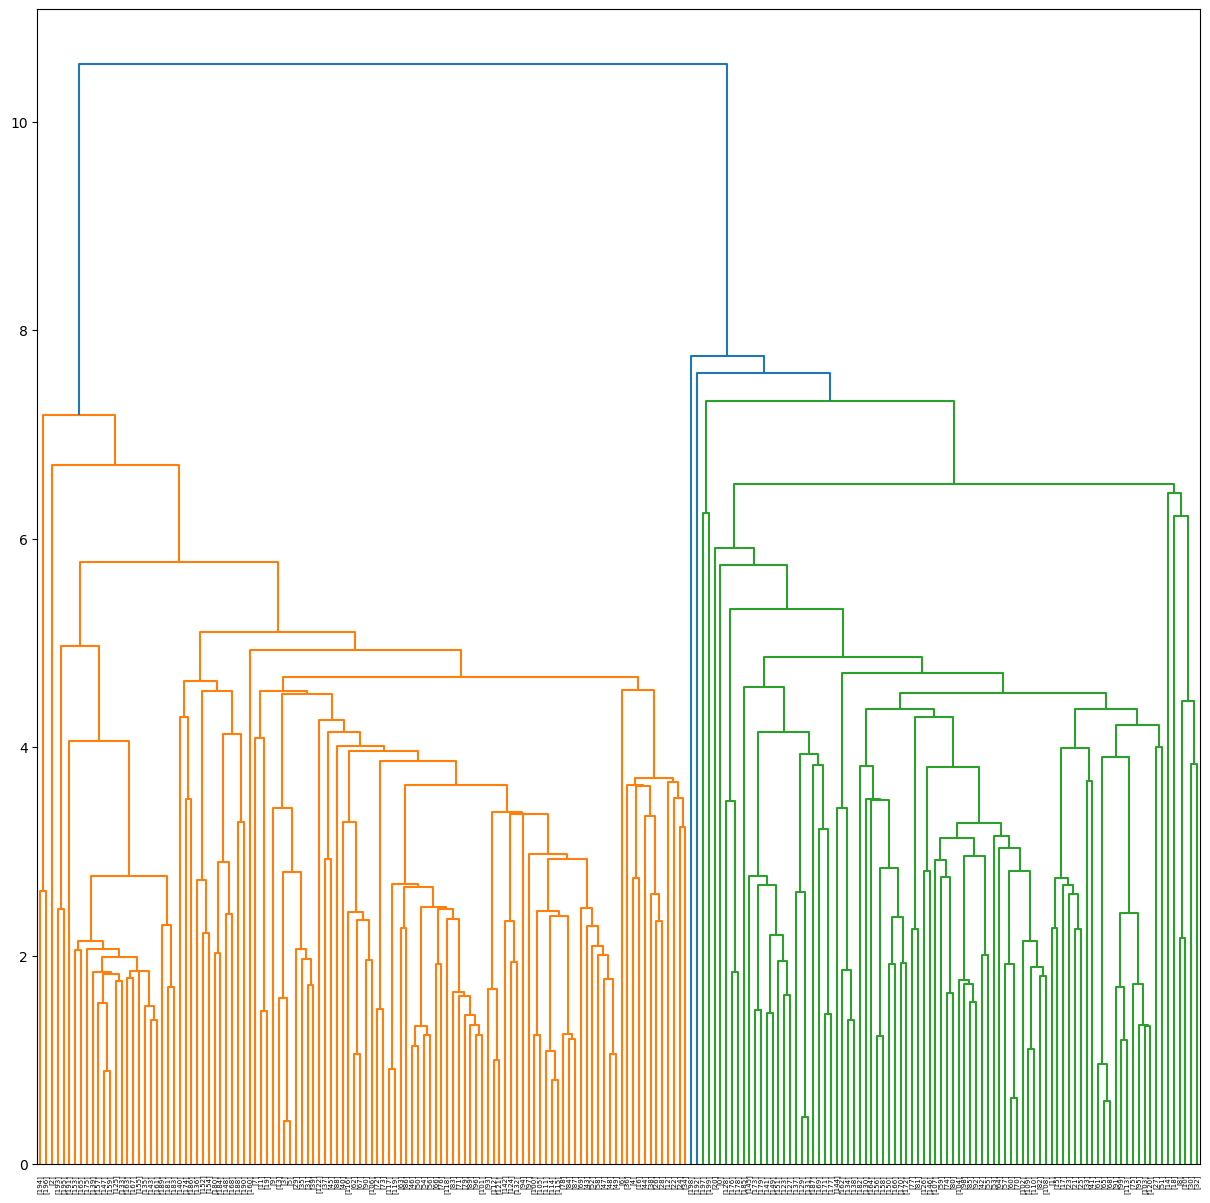

In [ ]:
plt.figure(figsize=(15,15))
dendro = shc.dendrogram(Z2, leaf_label_func=(lambda id: '[%s]' %id))

In [ ]:
Z3 = shc.linkage(D, 'average')
max_clust = 5
clusters3 = fcluster(Z3, max_clust, criterion='maxclust')
clusters3

array([4, 4, 2, 3, 2, 3, 2, 3, 5, 3, 5, 3, 2, 3, 5, 4, 2, 4, 5, 3, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 3, 5, 3, 5, 4, 2, 3, 2, 3, 2, 3, 2, 4, 5, 3,
       2, 3, 2, 3, 3, 3, 2, 4, 3, 5, 2, 5, 2, 5, 3, 5, 5, 4, 2, 2, 5, 4,
       2, 2, 4, 3, 5, 2, 2, 2, 5, 4, 2, 5, 3, 2, 5, 5, 5, 2, 3, 5, 2, 3,
       3, 2, 2, 4, 5, 3, 3, 4, 2, 3, 5, 4, 3, 2, 5, 4, 5, 3, 2, 5, 5, 5,
       5, 3, 3, 4, 3, 3, 2, 2, 2, 2, 4, 3, 3, 4, 3, 3, 5, 4, 5, 4, 5, 4,
       3, 3, 5, 3, 2, 4, 5, 3, 2, 4, 3, 3, 5, 4, 5, 3, 2, 4, 5, 4, 2, 3,
       2, 3, 5, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3, 2, 4, 5, 4, 5, 4, 2, 3,
       5, 4, 5, 4, 2, 3, 5, 3, 2, 4, 2, 4, 2, 3, 2, 3, 1, 3, 1, 3, 1, 1,
       1, 1], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(D, clusters3)
silhouette_avg

0.2888379044765559

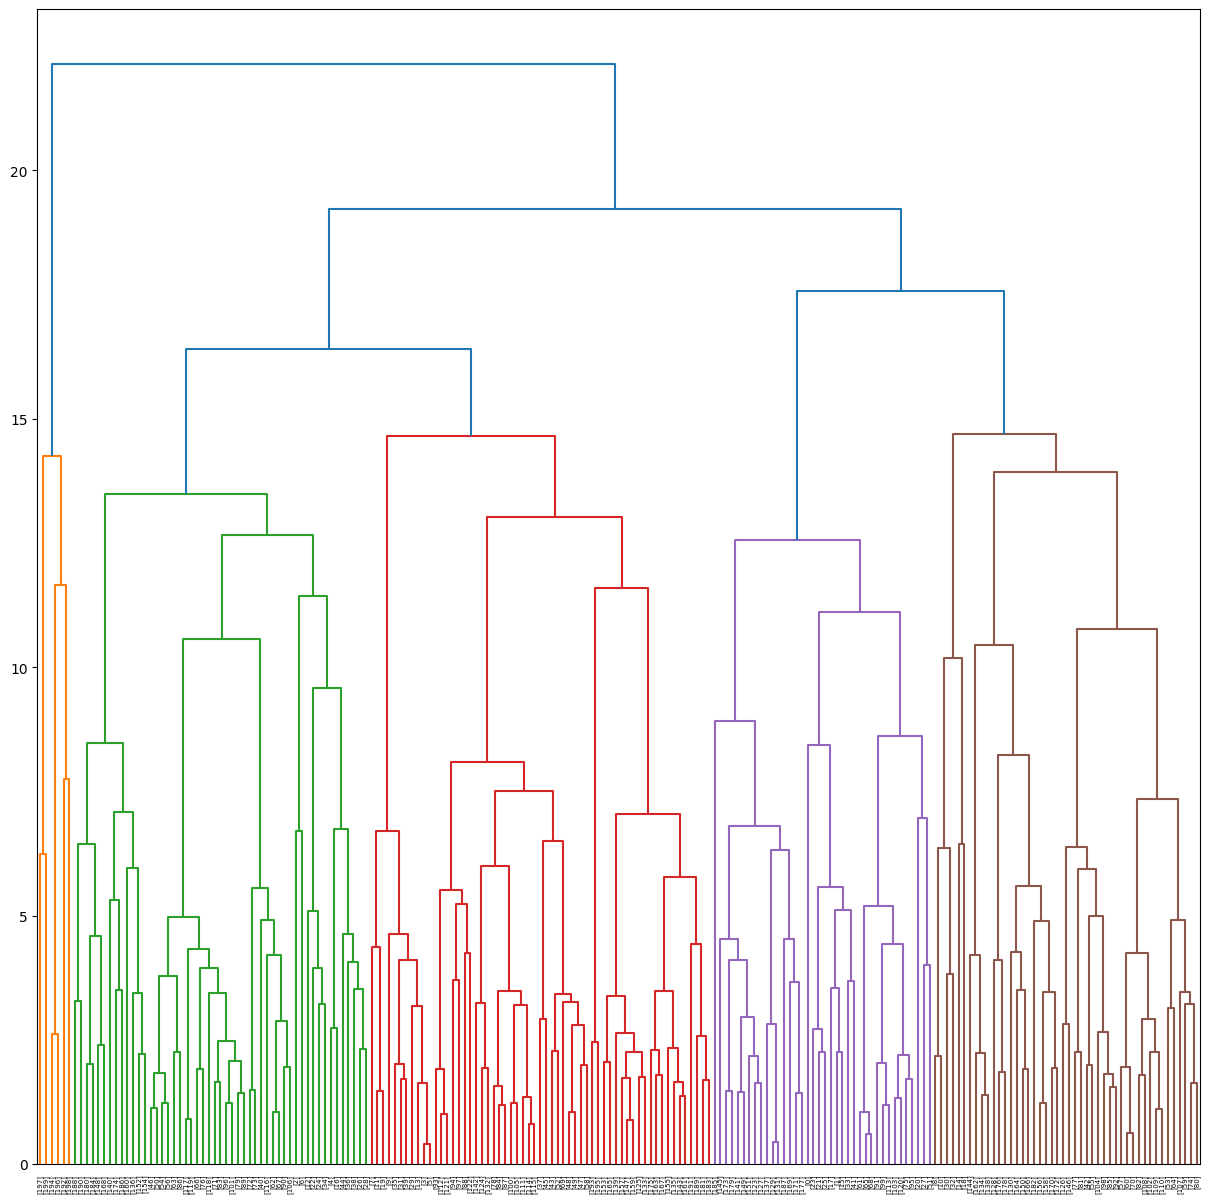

In [ ]:
plt.figure(figsize=(15,15))
dendro = shc.dendrogram(Z3, leaf_label_func=(lambda id: '[%s]' %id))